In [1]:
# Importations
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Chargement du dataset
df = pd.read_csv(r"/kaggle/input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv")

# Préparation des données
# Supposons que la colonne 'fraudulent' est la cible (0 = réel, 1 = fake)
X = df.drop('fraudulent', axis=1)
y = df['fraudulent']

# Remplacer les NaN par des valeurs neutres (optionnel, dépend du besoin)
X = X.fillna('')

# Si certaines colonnes sont textuelles, il faut les vectoriser
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Pour simplifier, concaténer tous les champs texte
text_columns = X.select_dtypes(include=['object']).columns
X_text = X[text_columns].apply(lambda x: ' '.join(x), axis=1)
# Vectorisation du texte
vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X_text)

# Division des données : 80% entraînement, 10% validation, 10% test
X_temp, X_test, y_temp, y_test = train_test_split(X_vectorized, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1111, random_state=42)  
# 0.1111 * 0.9 ≈ 0.1

print(f"Taille du Training Set : {X_train.shape}")
print(f"Taille du Validation Set : {X_val.shape}")
print(f"Taille du Testing Set : {X_test.shape}")

Taille du Training Set : (14304, 5000)
Taille du Validation Set : (1788, 5000)
Taille du Testing Set : (1788, 5000)


In [3]:
# Création du modèle de régression logistique
model = LogisticRegression(max_iter=1000)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1693
           1       1.00      0.45      0.62        95

    accuracy                           0.97      1788
   macro avg       0.99      0.73      0.80      1788
weighted avg       0.97      0.97      0.97      1788

AUROC (AUC ROC): 0.9617


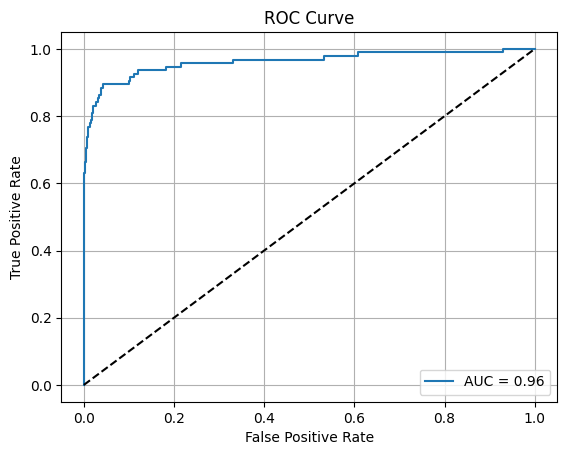

In [4]:
# Entraînement du modèle
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe 1

# Évaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

# === AUROC ===
from sklearn.metrics import roc_auc_score, roc_curve
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUROC (AUC ROC): {auc_score:.4f}")

# Courbe ROC (optionnelle mais utile)
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [5]:
import joblib

# Save the trained model
joblib.dump(model, 'logistic_model.pkl')

# Save the fitted TF-IDF vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']